# Projektaufgabe: Deskriptive Statistik und Visualisierungen

Für den Online-Artikel zum Kundenstamm der Bibliothek braucht die Pressestelle einige interessanten Zahlen zum Thema Alter und Bibliotheksnutzung. Außerdem möchte sie die Daten in einer Info-Graphik zusammenstellen.

Für eine erste Demo bist Du verantwortlich:

    Berechne 2-3 Statistiken und erstelle 2-3 Visualisierungen basierend auf den Informationen im Datensatz.
    Nutze pandas zur Berechnung der Statistiken und seaborn für die Visualisierungen.

Lade bis spätestens 25.03.21 Deinen Report in Form eines Jupyter Notebooks in der Dateiablage in Moodle hoch.

In [1]:
# import modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# matplotlib inline
sns.set()

# Daten einlesen und Nullwerte benennen
df = pd.read_csv("../data/Library_Usage.csv", na_values="None")
#print(*df.keys(), sep='\n')
print(df.dtypes)

Patron Type Code                  int64
Patron Type Definition           object
Total Checkouts                   int64
Total Renewals                    int64
Age Range                        object
Home Library Code                object
Home Library Definition          object
Circulation Active Month         object
Circulation Active Year         float64
Notice Preference Code           object
Notice Preference Definition     object
Provided Email Address             bool
Year Patron Registered            int64
Outside of County                  bool
Supervisor District             float64
dtype: object


# Datenpflege

In [2]:
# Wir entfernen pauschal alle Datensätze (Beobachtungen), die fehlende Werte enthalten. 
df.dropna(inplace=True)
#df.head(10)

## Statistik 1 - In welchem Verhältnis stehen die Ausleihen und Verlängerungen zum Alter?

* In den Altergruppen 0 bis 9 und 20 bis 44 Jahre sind die Ausleihen verhältnismäßig gering. Das heißt, dass vor allem Leseanfänger, Schulabgänger bzw. Studenten und Berufstätige wenig ausleihen. 
* Die wenigstens Ausleihen finden sich in der Altersgruppe 25 bis 34. Es leihen also besonders die Berufsanfänger äußerst wenig aus.
* Am meisten leihen Kinder- und Jugendliche und Vorruheständler bzw. Senioren aus. Hieraus könnte man schließen, dass die zur Verfügung stehende Freizeit einen besonderen Einfluss darauf hat.
* Interessant ist auch, dass mit Eintritt des Ruhestands die Zahl ver Verlängerung wieder abnimmt, die Kurven aus Ausleihen und Verlängerungen ansonsten aber einen ähnlichen Verlauf haben.
* Trotzdem gibt es eine besondere Beobachtung, wenn man das Verhältnis aus Verlängerungen zu den getätigten Ausleihen betrachtet:
 * Berufsanfänger und Berufstätige haben die höchste Verlängerungsquote. Sprich die Bücher, die diese Gruppe ausleiht, verbleiben vermutlich im Schnitt deutlich länger dort, als in anderen Gruppen.
 * Den höchsten Umsatz machen die Rentner, die viele Bücher ausleihen, nur wenige Verlängerungen machen und somit im Rückschluss viel Zeit zum Lesen zu Verfügung haben.
 * Schüler bzw. Kinder- und Jugendliche haben einen ähnlich hohen Umsatz wie die Rentner. Auch hier könnte man im Rückschluss die zur Verfügung stehende Freizeit als Faktor betrachten. Möglicherweise werden aber auch Bücher für Schulprojekte benötigt, wodurch häufig viele Bücher ausgeliehen werden, aber tatsächlich nur für kurze Zeit benötigt werden.

In [3]:
# Mittelwerte
df2 = df[['Age Range', 'Total Checkouts', 'Total Renewals']].groupby(['Age Range']).mean()
df2.reset_index(inplace=True)
df2.rename(columns={'Total Checkouts': 'Mean Total Checkouts', 'Total Renewals': 'Mean Total Renewals'}, inplace=True)
# Verhältnis Verlängerung/Ausleihe
df2['Mean Renewal Rate'] = round((df2['Mean Total Renewals']) / (df2['Mean Total Checkouts'])*100, 1)
df2

,Age Range,Mean Total Checkouts,Mean Total Renewals,Mean Renewal Rate
0,0 to 9 years,149.587816,44.607419,29.8
1,10 to 19 years,289.050401,64.001924,22.1
2,20 to 24 years,156.743968,50.646261,32.3
3,25 to 34 years,67.121850,37.584272,56.0
4,35 to 44 years,137.523749,71.050634,51.7
5,45 to 54 years,243.594186,105.640836,43.4
6,55 to 59 years,319.410727,127.667481,40.0
7,60 to 64 years,353.669876,135.300831,38.3
8,65 to 74 years,378.701260,127.432878,33.6
9,75 years and over,382.858415,90.742424,23.7


<AxesSubplot:xlabel='Mean Total Checkouts', ylabel='Age Range'>

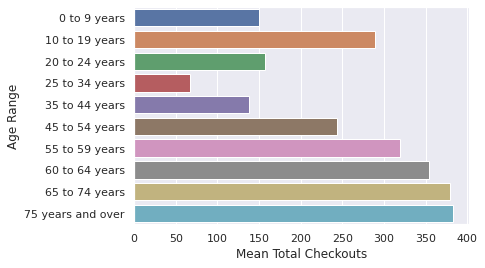

In [4]:
sns.barplot(x='Mean Total Checkouts', y='Age Range', data=df2)

<AxesSubplot:xlabel='Mean Total Renewals', ylabel='Age Range'>

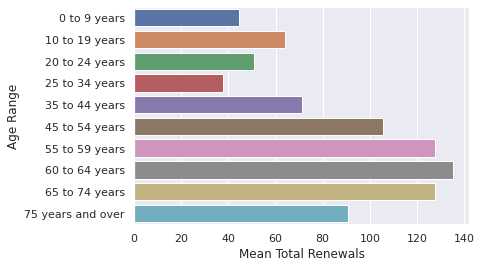

In [5]:
sns.barplot(x='Mean Total Renewals', y='Age Range', data=df2)

<AxesSubplot:xlabel='Mean Renewal Rate', ylabel='Age Range'>

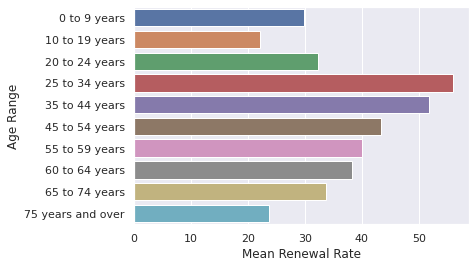

In [6]:
sns.barplot(x='Mean Renewal Rate', y='Age Range', data=df2)

# Statistik 2 - Was lässt sich zur Ausleihaktivität sagen?

* Die Bibliothek hat zum Zeitpunkt der Erhebung (2016) 43,5% aktive Nutzer:innen gehabt - sprich es haben von allen registrierten Nutzer:innen 43,5% in 2016 auch ihre letzte Ausleihe getätigt.
* Bezieht man 2015 mit ein, dann haben 65,8% (also fast Zweidrittel) aller registrierten Nutzer:innen in den letzten zwei Jahren die Bibliothek genutzt
* 34,2% der Nutzer:innen sind inaktiv und haben die Bibliothek länger als 2 Jahre nicht mehr genutzt

* 55% unserer aktiven Nutzer:innen sind Erwachsene (63% aller Nutzer:innen)
* 23% unserer aktiven Nutzer:innen sind Kinder und Jugendliche (17% aller Nutzer:innen)
* 12% unserer aktiven Nutzer:innen sind sind Senioren (10% aller Nutzer:innen)
* 7% unserer aktiven Nutzer:innen sind junge Erwachsene (7,5% aller Nutzer:innen)
* 2% unserer aktiven Nutzer:innen sind gehören zu anderen Benutzergruppen

* Bezogen auf den gesamten Kundenstamm sind Kinder und Jugendliche sowie Senioren überdurchschnittlich aktiv.

In [7]:
df3 = df[['Circulation Active Year']].groupby(['Circulation Active Year']).size().to_frame(name="Last Activity")
df3['Last Activity'] = round((df3['Last Activity']/df.shape[0])*100, 1)
df3.reset_index(inplace=True)
df3

,Circulation Active Year,Last Activity
0,2003.0,0.0
1,2004.0,0.1
2,2005.0,0.1
3,2006.0,0.1
4,2007.0,0.2
5,2008.0,0.3
6,2009.0,0.5
7,2010.0,0.7
8,2011.0,0.8
9,2012.0,2.4


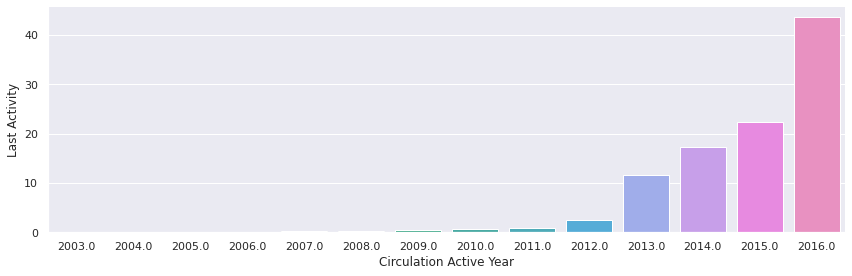

In [8]:
sns.catplot(x='Circulation Active Year', y='Last Activity', kind="bar", height=4, aspect=3, data=df3)

In [9]:
df3 = df[(df['Circulation Active Year'] == 2016)]
df4 = df3[['Circulation Active Year', 'Patron Type Definition']].groupby(['Circulation Active Year', 'Patron Type Definition']).size().to_frame(name="2016 Count").reset_index()
temp = df[['Patron Type Definition']].groupby(['Patron Type Definition']).size().to_frame(name="Count").reset_index()
df4['Total Count'] = temp['Count']
temp_sum = df4['2016 Count'].sum()
df4['2016 Count Percentage'] = round((df4['2016 Count']/temp_sum)*100, 1)
temp_sum = df4['Total Count'].sum()
df4['Total Count Percentage'] = round((df4['Total Count']/temp_sum)*100, 1)
df4

,Circulation Active Year,Patron Type Definition,2016 Count,Total Count,2016 Count Percentage,Total Count Percentage
0,2016.0,ADULT,66377,172586,55.4,62.7
1,2016.0,AT USER ADULT,67,206,0.1,0.1
2,2016.0,AT USER JUVENILE,12,34,0.0,0.0
3,2016.0,AT USER SENIOR,13,40,0.0,0.0
4,2016.0,AT USER TEEN,7,26,0.0,0.0
5,2016.0,AT USER WELCOME,3,16,0.0,0.0
6,2016.0,BOOKS BY MAIL,42,70,0.0,0.0
7,2016.0,DIGITAL ACCESS CARD,50,144,0.0,0.1
8,2016.0,FRIENDS FOR LIFE,13,24,0.0,0.0
9,2016.0,JUVENILE,27970,46401,23.4,16.9


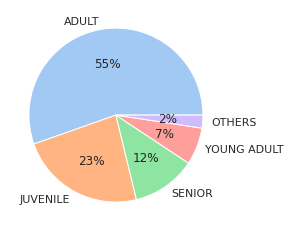

In [10]:
#define data
data = df4[df4['2016 Count Percentage'] > 1.0]['2016 Count Percentage']
temp_data = pd.Series(df4[df4['2016 Count Percentage'] <= 1.0]['2016 Count Percentage'].sum())
data = pd.concat([data, temp_data], ignore_index=True)

labels = df4[df4['2016 Count Percentage'] > 1.0]['Patron Type Definition']
temp_labels = pd.Series(['OTHERS'])

labels = pd.concat([labels, temp_labels], ignore_index=True)

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

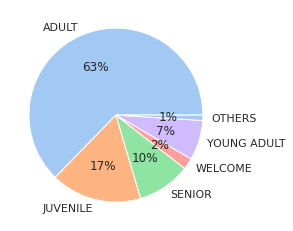

In [11]:
#define data
data = df4[df4['Total Count Percentage'] > 1.0]['Total Count Percentage']
temp_data = pd.Series(df4[df4['Total Count Percentage'] <= 1.0]['Total Count Percentage'].sum())
data = pd.concat([data, temp_data], ignore_index=True)

labels = df4[df4['Total Count Percentage'] > 1.0]['Patron Type Definition']
temp_labels = pd.Series(['OTHERS'])
labels = pd.concat([labels, temp_labels], ignore_index=True)

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

# Statistik 3 - Wie viele Ausleihen werden im Mittel pro Altersgruppe und pro Jahr getätigt? Ist die Streuung zwischen den Gruppen gleich??

* Die durchschnittlichen Ausleihen unserer aktiven Nutzer sind sich im Mittel sehr ähnlich. Für Kinder- und Jugendliche, junge Erwachsene und Senioren liegt diese bei ca. 48-49 Ausleihen pro Jahr. Nur bei Erwachsenen ist ein Einbruch festzustellen und die durchschnittlichen Ausleihen liegen bei nur ca. 30 pro Jahr.
* Bei Kindern und Jugendlichen und jungen Erwachsenen ist die Streuung um den Mittelwert sehr ähnlich und liegt bei ca. 63, bei Senioren 77 und bei Erwachsenen nur noch bei 57.
* Die durchschnittlichen Verlängerungen sind in allen Gruppen sehr ähnlich und liegen zwischen 11-14 Verlängerungen. Hier ist kein großer Unterschied zwischen den durchschnittlichen Verlängerungen festzustellen.

In [12]:
# Wir betrachten mal nur die 4 Hauptgruppen und nur aktive Nutzer:innen
df6 = df[((df['Patron Type Definition'] == 'JUVENILE') | 
   (df['Patron Type Definition'] == 'YOUNG ADULT') | 
   (df['Patron Type Definition'] == 'ADULT') | 
   (df['Patron Type Definition'] == 'SENIOR')) & 
   (df['Circulation Active Year'] == 2016)].copy()

df6['Years Active'] = df6['Circulation Active Year']-df6['Year Patron Registered']
df6['Checkouts per Year'] = df6['Total Checkouts']/(df6['Years Active']+1)
df6['Renewals per Year'] = df6['Total Renewals']/(df6['Years Active']+1)
df6['Renewal-to-Checkout-Ratio'] = df6['Renewals per Year']/df6['Checkouts per Year']

for i in df6['Patron Type Definition'].unique():
    print(i)
    print('Mean Checkouts: ' + str(df6[(df6['Patron Type Definition'] == i)]['Checkouts per Year'].mean()))
    print('Std Checkouts: ' + str(df6[(df6['Patron Type Definition'] == i)]['Checkouts per Year'].std()))
    print('Mean Renewals: ' + str(df6[(df6['Patron Type Definition'] == i)]['Renewals per Year'].mean()))
    print('Std Renewals: ' + str(df6[(df6['Patron Type Definition'] == i)]['Renewals per Year'].std()))
    print()

ADULT
Mean Checkouts: 30.392298128984798
Std Checkouts: 57.12047288326042
Mean Renewals: 13.699935130061586
Std Renewals: 30.20610931891032

SENIOR
Mean Checkouts: 49.59332148301148
Std Checkouts: 77.10709816492209
Mean Renewals: 14.6751864010119
Std Renewals: 34.523158165307336

JUVENILE
Mean Checkouts: 48.72810806610867
Std Checkouts: 62.95964027584581
Mean Renewals: 12.10882839849151
Std Renewals: 31.095730401704213

YOUNG ADULT
Mean Checkouts: 48.854338828341916
Std Checkouts: 62.950707056617134
Mean Renewals: 11.359989152170378
Std Renewals: 23.550533538924046



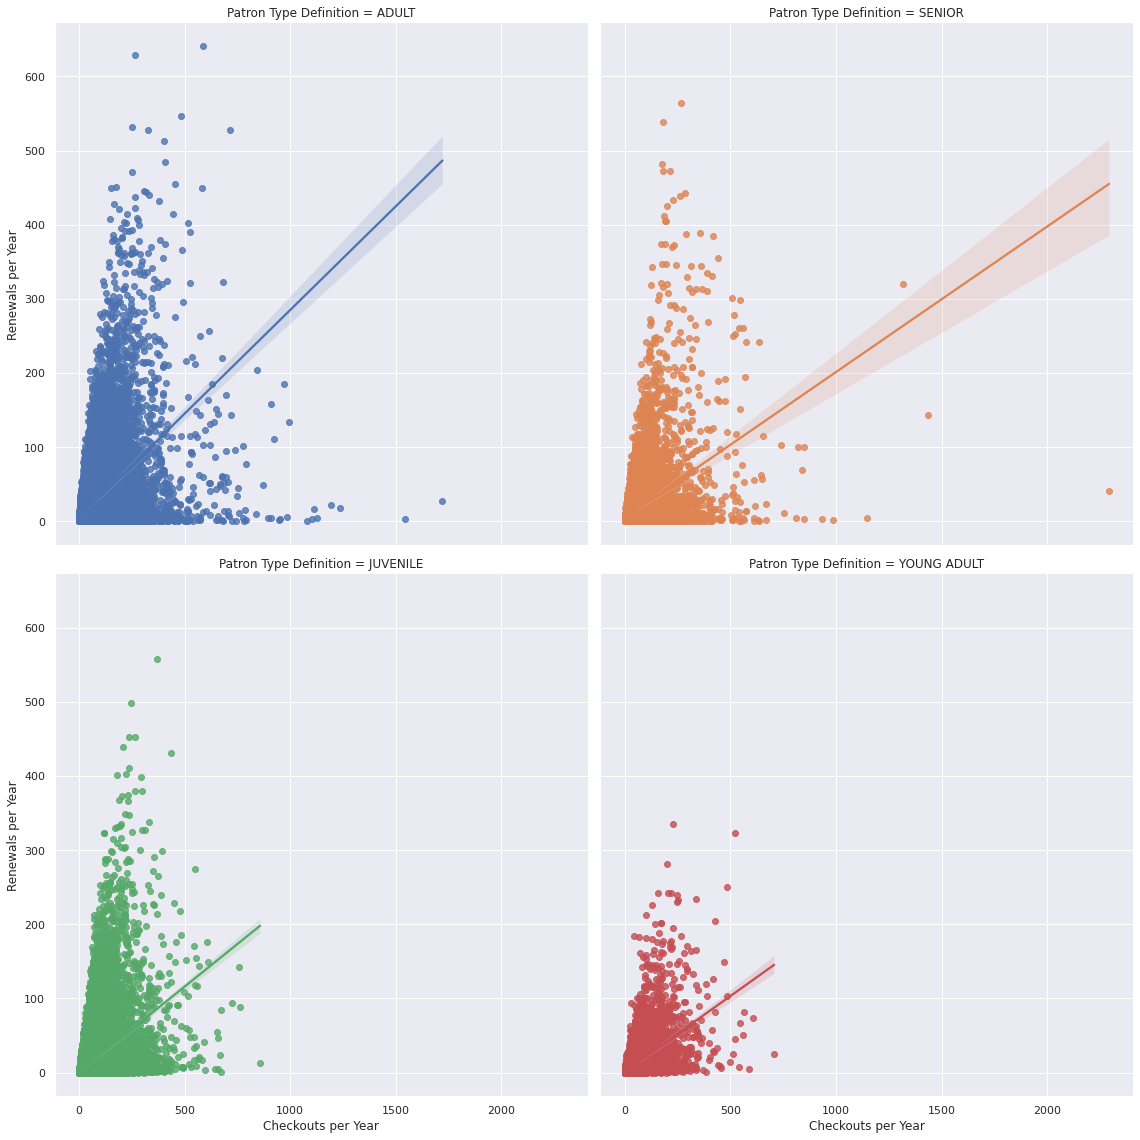

In [13]:
sns.lmplot(x='Checkouts per Year', y='Renewals per Year', hue='Patron Type Definition', height=8, col="Patron Type Definition", col_wrap=2, data=df6)